In [1]:
import torch
from datasets import Dataset, DatasetDict, IterableDataset, load_dataset,load_from_disk
import hashlib
import os
import tqdm
# 示例文件路径
file_path = "/aifs4su/yaodong/changye/data/AA_preference_mistral-7b_interp/AA_preference_cosi_weight/AA_preference_mistral-7b_cooccur.pt"
global_key="cosi"
# os.environ['HF_DATASETS_CACHE']='/mnt/file2/changye/tmp'
# 读取 .pt 文件
data = torch.load(file_path)

dataset_path="/aifs4su/yaodong/changye/data/AA_preference"
train_dataset = load_dataset(
            dataset_path,
            split="train",
            trust_remote_code=True,
            cache_dir=dataset_path
        )


/aifs4su/yaodong/miniconda3/envs/lcy_interp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [2]:
print(train_dataset)


Dataset({
    features: ['question', 'image', 'response_1', 'response_2', 'res_1_from', 'res_2_from', 'p_response', 'prompt_following_rate_1', 'prompt_following_rate_2', 'p_rationale_1', 'p_rationale_2', 'o_response', 'objective_rules_rate_1', 'objective_rules_rate_2', 'o_rationale_1', 'o_rationale_2', 'c_response', 'clarity_rate_1', 'clarity_rate_2', 'c_rationale_1', 'c_rationale_2', 'i_response', 'information_richness_rate_1', 'information_richness_rate_2', 'i_rationale_1', 'i_rationale_2', 's_response', 'safety_rate_1', 'safety_rate_2', 's_rationale_1', 's_rationale_2', 'text_critique_1', 'text_critique_2', 'overall_response', 'overall_textfeedback'],
    num_rows: 39216
})


In [3]:
# 定义需要保留的列
columns_to_keep = ['question', 'image', 'response_1', 'response_2', 'p_response']

# 使用 remove_columns 移除不需要的列
train_dataset = train_dataset.remove_columns([col for col in train_dataset.column_names if col not in columns_to_keep])

# 打印结果
print(train_dataset)
print(train_dataset[0])


Dataset({
    features: ['question', 'image', 'response_1', 'response_2', 'p_response'],
    num_rows: 39216
})
{'question': 'What might have caused the stop sign to be in its current condition?', 'image': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x80\x01\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTU

In [4]:

data_list=[]
for data_l in data:
    keys=list(data_l.keys())
    for key in keys:
        data_list.append((key,data_l[key]))


In [5]:
print(len(data_list))
print(data_list[0]) 

38974
('6b86e1c57b30e977f3cf7b322ffe94bcd7da0b5d845b647e0bd171b39e94aa3d', [41473, 19972, 2053, 6664, 41998, 44568, 13849, 41502, 47650, 27171, 50726, 14375, 5160, 63020, 25646, 36915, 64054, 57401, 47165, 11840, 61508, 61509, 9286, 5702, 55366, 11849, 20044, 59982, 13398, 1111, 38998, 1113, 18523, 22109, 21602, 64610, 21092, 44137, 26222, 29808, 43633, 115, 1142, 19062, 25209, 52860, 49278, 17538, 62088, 43657, 46217, 65170, 62618, 2205, 46749, 13471, 8864, 24737, 42656, 18592, 54435, 22179, 43689, 19625, 59564, 54451, 55997, 59072, 28865, 32962, 11970, 3779, 3785, 36553, 56521, 38096, 43217, 44241, 23763, 43732, 57040, 12502, 14553, 1755, 61147, 49887, 21219, 742, 61160, 58601, 10987, 63215, 27890, 56563, 14068, 44794, 20222, 51456, 8450, 9474, 17673, 25357, 59663, 39695, 18194, 790, 59673, 58655, 34079, 61729, 37666, 22305, 29988, 1317, 47907, 8999, 10024, 58153, 62250, 1835, 36140, 14122, 34094, 3376, 63288, 49469, 35134, 53567, 14660, 3398, 4939, 19790, 10067, 58196, 64341, 12635,

In [6]:
def generate_text_hash(text: str) -> str:
    """
    Generate a unique identifier for the given text using SHA-256.

    Args:
        text (str): Input text.

    Returns:
        str: Unique hash for the text.
    """
    hash_object = hashlib.sha256(text.encode('utf-8'))
    return hash_object.hexdigest()

In [7]:
from csv import Error


dataset_dict = {}
for j, item in tqdm.tqdm(enumerate(train_dataset), desc="Processing data_list", unit="item"):
    # key = generate_text_hash(item['question']+item['response_1']+item['response_2'])
    key=generate_text_hash(item['question']+item['response_1']+item['response_2'])
    if key not in dataset_dict:
        dataset_dict[key] = []
    dataset_dict[key].append(j)  # 记录每个idx对应的所有匹配位置

# 2. 生成 formatted_dataset，确保按照顺序匹配
formatted_dataset = []
index_set = set()  # 用来记录已经匹配过的 train_dataset 索引

# 使用 tqdm 显示进度条
for i in tqdm.tqdm(range(len(data_list)), desc="Processing data_list", unit="item"):
    key_datalist, value_datalist = data_list[i]
    
    # 查找是否存在匹配的key
    if key_datalist in dataset_dict:
        # 遍历匹配的索引
        for j in dataset_dict[key_datalist]:
            if j not in index_set:  # 如果该项未匹配过
                # 如果匹配，则将 value 从 data_list 加到 train_dataset 项中
                new_item = train_dataset[j].copy()  # 拷贝 train_dataset 项
                if global_key=="l0":
                    new_item[global_key] = float(value_datalist)
                elif global_key=="cooccur":
                    new_item[global_key] = len(value_datalist)
                elif global_key=="cosi":
                    new_item[global_key] = value_datalist
                else:
                    raise Error("not a proper global key")
                formatted_dataset.append(new_item)
                
                # 将已匹配的索引添加到 index_set
                index_set.add(j)
                break  # 找到一个匹配就跳出内层循环，继续下一个 data_list 的元素


Processing data_list: 39216item [00:04, 8740.99item/s] 
Processing data_list: 100%|██████████| 38974/38974 [00:05<00:00, 7304.86item/s] 


In [8]:
print(len(formatted_dataset))
print(formatted_dataset[0][global_key])

38974
[41473, 19972, 2053, 6664, 41998, 44568, 13849, 41502, 47650, 27171, 50726, 14375, 5160, 63020, 25646, 36915, 64054, 57401, 47165, 11840, 61508, 61509, 9286, 5702, 55366, 11849, 20044, 59982, 13398, 1111, 38998, 1113, 18523, 22109, 21602, 64610, 21092, 44137, 26222, 29808, 43633, 115, 1142, 19062, 25209, 52860, 49278, 17538, 62088, 43657, 46217, 65170, 62618, 2205, 46749, 13471, 8864, 24737, 42656, 18592, 54435, 22179, 43689, 19625, 59564, 54451, 55997, 59072, 28865, 32962, 11970, 3779, 3785, 36553, 56521, 38096, 43217, 44241, 23763, 43732, 57040, 12502, 14553, 1755, 61147, 49887, 21219, 742, 61160, 58601, 10987, 63215, 27890, 56563, 14068, 44794, 20222, 51456, 8450, 9474, 17673, 25357, 59663, 39695, 18194, 790, 59673, 58655, 34079, 61729, 37666, 22305, 29988, 1317, 47907, 8999, 10024, 58153, 62250, 1835, 36140, 14122, 34094, 3376, 63288, 49469, 35134, 53567, 14660, 3398, 4939, 19790, 10067, 58196, 64341, 12635, 63837, 32607, 42863, 36209, 32115, 49530, 12668, 30076, 6524, 11650,

In [9]:
# 定义文件路径
cosi_file_path = "/aifs4su/yaodong/changye/data/AA_preference_mistral-7b_pair_interp/AA_preference_mistral-7b_cosi_weight/cosi_feature_list.txt"  # 将此替换为你的文件路径

# 读取文件并转换为字典
osi_dict = {}
with open(cosi_file_path, "r") as file:
    for line in file:
        key, value = line.strip().split(",")  # 按逗号分割每行
        osi_dict[int(key)] = float(value)    # 将 key 转为 int, value 转为 float

# 输出结果
print(osi_dict)

{1: 0.1821695599088248, 5: 0.05959171964901886, 27: 0.2035333774011588, 28: 0.05490779200500808, 30: 0.07004249113680411, 41: 0.15613743092426333, 77: 0.16361536270722873, 99: 0.14907781592790673, 104: 0.10029805712086688, 164: 0.2869698169354291, 166: 0.0983598625961429, 202: 0.23753178086780635, 203: 0.19006155004431755, 219: 0.20951596780817225, 228: 0.1589560287016029, 229: 0.10622312847984547, 248: 0.24008768322034163, 314: 0.14849995122422116, 328: 0.2305951167228854, 333: 0.16925593526600452, 340: 0.27921511513004493, 342: 0.168802598791802, 362: 0.20770784341385892, 365: 0.24993240326483718, 366: 0.18463439216218575, 392: 0.19103301815775928, 395: 0.12889744119620944, 404: 0.11688255957562337, 414: 0.1577197887452586, 415: 0.113398012964576, 422: 0.14863938300189297, 423: 0.21700940687373813, 426: 0.155824012409571, 429: 0.1796903738894752, 451: 0.1964254123551626, 489: 0.1773012100602733, 493: 0.21269059209878732, 524: 0.11939497946725357, 583: 0.18120065432738858, 584: 0.2160

In [10]:
set_cosi_key=set(osi_dict.keys())
cosi_coocur_data={}
for f_data in tqdm.tqdm(formatted_dataset):
    score=0
    for value in f_data[global_key]:
        if value in set_cosi_key:
            score+=osi_dict[value]
    f_data[global_key]=score

 16%|█▌        | 6240/38974 [00:00<00:00, 62390.99it/s]

100%|██████████| 38974/38974 [00:00<00:00, 67648.83it/s]


In [11]:
print(formatted_dataset[-1][global_key])
print(formatted_dataset[0][global_key])
print(formatted_dataset[0]['image'])

5.839480551820735
4.747511524985942
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02U\x02\xee\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4

In [12]:
dataset = Dataset.from_list(formatted_dataset)
dataset.save_to_disk(f"/aifs4su/yaodong/changye/data/AA_preference_mistral-7b_{global_key}_pair_full")

Saving the dataset (14/14 shards): 100%|██████████| 38974/38974 [00:38<00:00, 1025.38 examples/s]


In [13]:
for item in formatted_dataset:
    item[global_key]=float(item[global_key])

In [14]:
# 1. 根据 l0 字段从大到小对数据集排序
formatted_dataset_sorted = dataset.sort(global_key, reverse=True)

In [15]:
print(formatted_dataset_sorted[0][global_key])
print(formatted_dataset_sorted[-1][global_key])

27.574579236678314
0.8981445981178426


In [16]:
from tqdm import tqdm

num_splits = 4
split_size = len(formatted_dataset_sorted) // num_splits
remainder = len(formatted_dataset_sorted) % num_splits

# 生成每个分段的索引范围
indices = []
start = 0
for i in range(num_splits):
    end = start + split_size + (1 if i < remainder else 0)
    indices.append((start, end))
    start = end

# 切分并保存（带进度条）
for i, (start, end) in tqdm(enumerate(indices), total=num_splits, desc="Saving splits"):
    # 计算当前区间的百分比范围
    pct_start = int(i * 100 / num_splits) + 1
    pct_end = int((i + 1) * 100 / num_splits)

    folder_name = f"./top{pct_start}-{pct_end}"
    split = formatted_dataset_sorted.select(range(start, end))
    split.save_to_disk(folder_name)


Saving splits: 100%|██████████| 4/4 [00:27<00:00,  6.77s/it]


/tmp/ipykernel_1613801/2533686575.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


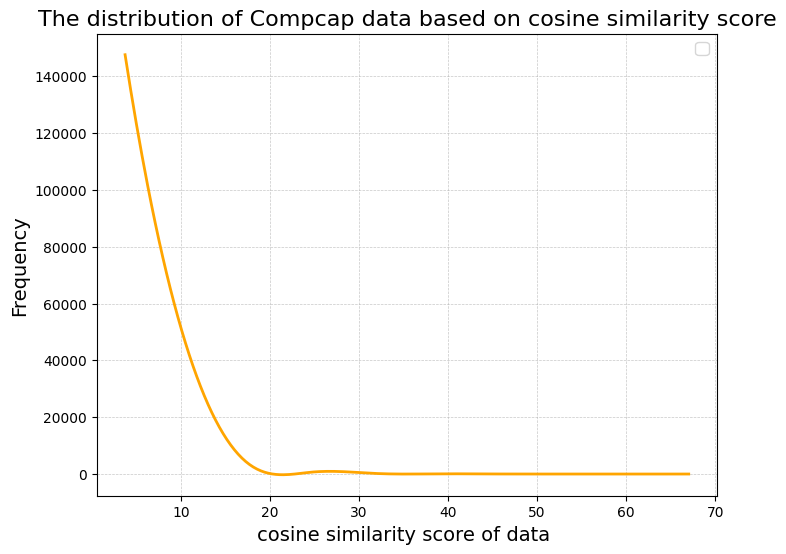

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from collections import Counter

# 假设 data_list 是一个包含数值的列表
# 例如：
# data_list = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
# values_list = [tensor['Cooccur'].cpu().item() if tensor['Cooccur'].is_cuda else tensor['Cooccur'].item() for tensor in formatted_dataset_sorted]
values_list=[float(tensor[global_key]) for tensor in formatted_dataset_sorted]
# 统计频率
num_bins = 10

# 生成直方图
frequencies, bin_edges = np.histogram(values_list, bins=num_bins)

# 计算每个区间的中心点（用于插值）
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 使用样条插值将直方图转换为平滑曲线
bin_centers_smooth = np.linspace(bin_centers[0], bin_centers[-1], 300)  # 插值点
frequencies_smooth = make_interp_spline(bin_centers, frequencies)(bin_centers_smooth)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(bin_centers_smooth, frequencies_smooth, color='orange', lw=2)


# 样式设置
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('cosine similarity score of data ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('The distribution of Compcap data based on cosine similarity score', fontsize=16)
plt.legend(fontsize=12)
plt.show()
